# Chapter 6. 일반선형모델

## 6.1 여러 가지 확률분포

* 이항확률변수: 2개의 값만 가지는 확률 변수 (예) 있다/없다, 앞/뒤
* 베르누이시행: 2종류의 결과 중 하나만 발생시키는 시행 (예) 동전의 앞면/뒷면
* 베르누이분포: 한 번의 베르누이 시행이 일어날 때, 이항확률변수가 따르는 확률분포
* 이항분포: 성공확률이 p면서 N회의 독립 베르누이 시행을 했을 때, 성공한 횟수 m이 따르는 이산형 확률분포
  * 확률변수 m의 기댓값 = Np
  * 분산 = Np(1-p)
* 이항분포의 확률질량함수

### 6.1.5 분석준비

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 6.1.6 이항분포(실습)

#### 확률질량함수(Probaility Mass Function)
* 파라미터: k(성공횟수), n(시행횟수), p(성공확률)

In [2]:
# 확률질량함수(Probaility Mass Function)
sp.stats.binom.pmf(k = 1, n = 2, p = 0.5)

0.5

In [3]:
# 난수 생성
np.random.seed(1)

# 앞이 나올 확률 20%인 동전을 10번 던져서 
# 앞이 나온 수를 세는 시행 5번
# n(시행횟수), p(성공확률), size(시행횟수)
sp.stats.binom.rvs(n = 10, p = 0.2, size = 5)

array([2, 3, 0, 1, 1])

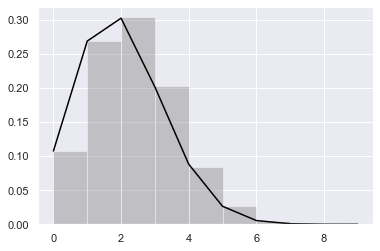

In [4]:
# N=10,p=0.2인 이항분포
binomial = sp.stats.binom(n = 10, p = 0.2)

# 난수
np.random.seed(1)
rvs_binomial = binomial.rvs(size = 10000)

# 확률밀도함수
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k = m)

# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.distplot(rvs_binomial, bins = m, kde = False, 
             norm_hist = True, color = 'gray')
plt.plot(m, pmf_binomial, color = 'black')

### 6.1.11 푸아송 분포(실습)

1) 정의

* 1개 또는 2개, 1회 또는 2회 등의 카운트 데이터가 따르는 이산형 확률분포

* 일어나기 어려운 사건이지만, 대상이 되는 사람수가 굉장히 많을 때의 발생건수

2) 특징: 기대값(평균) = 분산 = λ

3) 푸아송 분포의 확률질량함수(n: 카운트 데이터, λ = 강도)

![{\displaystyle f(n;\lambda )={\frac {\lambda ^{n}e^{-\lambda }}{n!}},\,\!}](https://wikimedia.org/api/rest_v1/media/math/render/svg/93ad8e91a5a4611aeac25ad18a63acb1ba2a7a3d)



4) 예제:  

* 하루의 교통사고 사상자수
* 바다에서 낚은 물고기의 수
- 일정 주어진 시간 동안에 도착한 고객의 수
- 1킬로미터 도로에 있는 흠집의 수
- 일정 주어진 생산시간 동안 발생하는 불량 수
- 하룻동안 발생하는 출생자 수
- 어떤 시간 동안 톨게이트를 통과하는 차량의 수
- 어떤 페이지 하나를 완성하는 데 발생하는 오타의 발생률

In [5]:
# 푸아송 분포의 확률질량함수
# 강도가 5인 푸아송 분포에서 어떤 값 2를 얻는 확률
sp.stats.poisson.pmf(k = 2, mu = 5)

0.08422433748856832

In [6]:
# λ=2(강도가 2)인 푸아송 분포를 따르는 난수 생성
np.random.seed(1)
sp.stats.poisson.rvs(mu = 2, size = 5)

array([2, 1, 0, 1, 2])

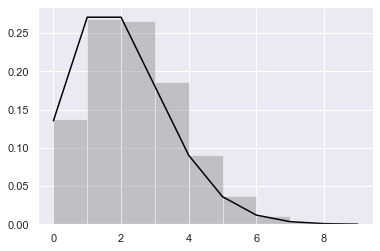

In [7]:
# λ=2인 푸아송 분포
poisson = sp.stats.poisson(mu = 2)

# 난수
np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)

# 확률질량함수
pmf_poisson = poisson.pmf(k = m)

# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.distplot(rvs_poisson, bins = m, kde = False, 
             norm_hist = True, color = 'gray')
plt.plot(m, pmf_poisson, color = 'black')

### 이항분포와 푸아송분포의 관계 

* 이항분포(점선)
  * 시행횟수: 100,000,000회
  * 성공확률: 0.00000002

* 푸아송분포(실선)
  * 강도 2

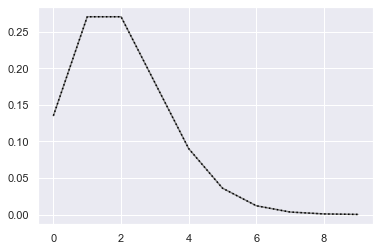

In [8]:
# N이 크고 p가 작은 이항분포
N = 100000000
p = 0.00000002
binomial_2 = sp.stats.binom(n = N, p = p)

# 확률질량함수
pmf_binomial_2 = binomial_2.pmf(k = m)

# 확률질량그래프
plt.plot(m, pmf_poisson, color = 'gray')
plt.plot(m, pmf_binomial_2, color = 'black', 
         linestyle = 'dotted')

#### 결론 
* 푸아송 분포(실선)와 이항분포(점선)의 확률분포가 거의 일치
* 푸아송 분포는 성공확률이 한없이 0에 가깝지만, 시행횟수가 무한히 많은 이항분포